# Optimizing function 1: Mini-Batch Gradient Descent

## Dataset

This is a data set of 11,228 Reuters news stories, tagged into 46 topics. There are 46 theme categories into which a story can be categorized into (so it's not a binary classification).

Each news item is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the data set, so that, for example, the integer "3" encodes the third most frequent word in the data. This allows quick filtering operations such as: "consider only the 10,000 most common words, but eliminate the 20 most common words."

**Note**: This exercise is similar to the Feelings classification (film review), so many concepts will not be detailed here, you can check the other document for deeper insights.




## Dataset importing and visualizing

In [ ]:
from tensorflow.keras.datasets import reuters

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
word_index = reuters.get_word_index()
word_index

550378/550378 [==============================] - 0s 0us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [ ]:
print("Trainning data:", len(train_data))
print("Testing data:", len(test_data))

Trainning data: 8982
Testing data: 2246


In [ ]:
# First new for the train data
print(train_data[0])

# each number represents the frequency of that word (except 0,1,2 which can be lost words that have not been imported, among others)

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
reversed_word_index = {v: k for k, v in word_index.items()}
' '.join([reversed_word_index.get(i - 3, '(' + str(i) + ')') for i in train_data[0]])

#this is the decoded new article

'(1) (2) (2) said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

The variables _train_labels_ and _test_labels_ are a list of values (*):
```
"reuters":
  ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
   'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
   'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
   'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
   'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead'],
```
(*) https://github.com/keras-team/keras/issues/12072

These are the different categories from the news articles.

In [ ]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

## Preprocessing

In [ ]:
import numpy as np

def vectorize(seqs, dim=10000):
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1.
    return results

In [ ]:
# Vectorize train and test set
X_train = vectorize(train_data, 10000)
X_test = vectorize(test_data, 10000)

In [ ]:
print("Valores originales:\t", train_data[0][:15])
print("Valores vectorizados:\t", X_train[0][:15])

# remember, we can't input values without being normalized in our neural network

Valores originales:	 [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16]
Valores vectorizados:	 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]


In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

In [ ]:
train_labels[0] # the first is from the 3rd category, which is the word 'veg-oil'

3

In [ ]:
Y_train[0] # we see that number 3 (starting from 0) is a 1 after the normalization

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Data division

In [ ]:
from sklearn.model_selection import train_test_split

X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5)

In [ ]:
print("Length train set: ", len(X_train))
print("Length validation set: ", len(X_val))
print("Length test set: ", len(X_test))

Length train set:  8982
Length validation set:  1123
Length test set:  1123


## Neural network construcction

We have very few data, so if we use a big enural network we'll generate overfitting. Therefore, the network can't be very deep or with many neurons.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))  # it is a multiclass classification : 46 neurons, one for each category we have

In [ ]:
from tensorflow.keras import optimizers

opt_func = optimizers.SGD(learning_rate=0.01)

In [ ]:
model.compile(
    optimizer=opt_func,
    loss='categorical_crossentropy',
    metrics=['accuracy', 'Precision']
)

In [ ]:
len(X_train) / 281  # mini - batch size

# In this case, for each epoch, we get the values actualized 281 times (for example, Epoch 2/30 281/281 [==============================] "")

31.964412811387902

In [ ]:
len(X_train) / 32

280.6875


- If the size of the mini batch is **big**, the training of the algorithm is slower and we have less parameters modified for each epoch. However, it is more direct and smooth in reaching the parameters that minimize the error.

- If the size of the mini batch is **small** (for example in this case below, which is 30) we have less examples to modify the parameters values (and sometimes it can happen that we modify it in the wrong direction). However, it will be faster to minimizing the error since it will be less actualizations of the patameters for each epoch.

In [ ]:
history = model.fit(
    X_train,
    Y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, Y_val))

Epoch 1/30
281/281 [==============================] - 10s 30ms/step - loss: 2.3696 - accuracy: 0.4822 - precision: 0.9353 - val_loss: 1.8580 - val_accuracy: 0.5521 - val_precision: 0.9236
Epoch 2/30
281/281 [==============================] - 9s 33ms/step - loss: 1.6729 - accuracy: 0.6032 - precision: 0.9301 - val_loss: 1.6392 - val_accuracy: 0.6278 - val_precision: 0.9175
Epoch 3/30
281/281 [==============================] - 8s 30ms/step - loss: 1.4815 - accuracy: 0.6642 - precision: 0.9238 - val_loss: 1.5157 - val_accuracy: 0.6670 - val_precision: 0.9203
Epoch 4/30
281/281 [==============================] - 7s 26ms/step - loss: 1.3505 - accuracy: 0.6933 - precision: 0.9267 - val_loss: 1.4232 - val_accuracy: 0.6750 - val_precision: 0.9096
Epoch 5/30
281/281 [==============================] - 8s 30ms/step - loss: 1.2497 - accuracy: 0.7182 - precision: 0.9258 - val_loss: 1.3501 - val_accuracy: 0.6901 - val_precision: 0.8987
Epoch 6/30
281/281 [==============================] - 9s 32ms/st

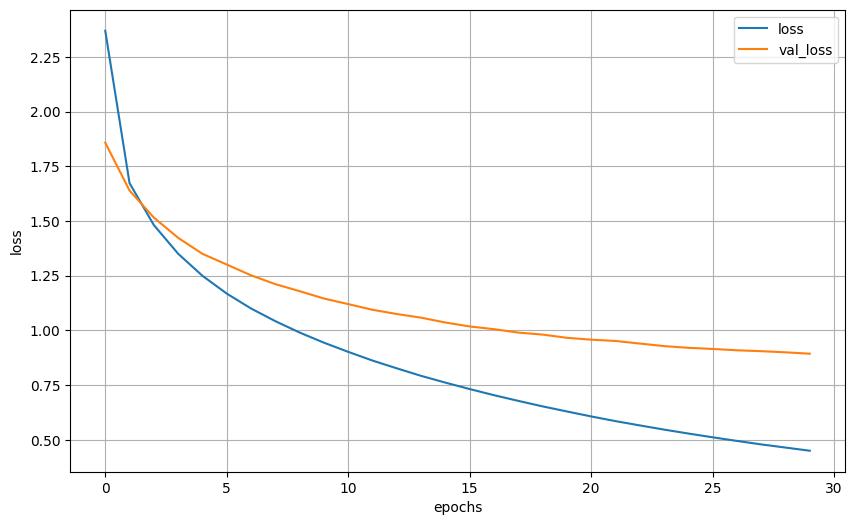

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

We can see there's a bit of overfitting.

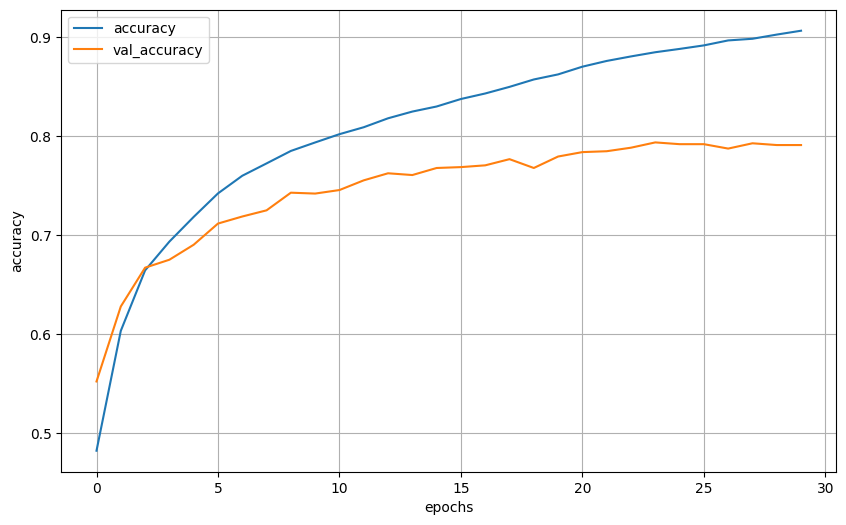

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

### Predicción con el subconjunto de datos de pruebas

In [ ]:
error, accuracy, precision = model.evaluate(X_test, Y_test)

36/36 [==============================] - 0s 10ms/step - loss: 0.8716 - accuracy: 0.7961 - precision: 0.8992


In [ ]:
print("Error: ", error)
print("Accuracy: ", accuracy)
print("Precision: ", precision)

Error:  0.8715574145317078
Accuracy:  0.7960819005966187
Precision:  0.8991981744766235


The result is acceptable given the small number of data.